In [1]:
import pandas as pd
from pandas import DataFrame

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1yQBMGzutWwVJJbVGtCmttIjHYr3-wTW9/edit#gid=1741895064'
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df = pd.read_csv(csv_export_url)

df = df.drop(['release_date','modèle','tag','note.1','punch_position',"note"], axis=1)
#df = df.dropna()

df

,punch,release_year,title,artists,previous_punchs,next_punchs,url,word_searched,full_punch
0,"Les murs transpirent, enlève ton T-Shirt, Manny",2002,113 Fout La Merde (Ft. Thomas Bangalter),113,"Fous la merde vas-y, Gros, c’est les rhamé,C’e...","On t’mets à poil comme au 421, au casino ou,Mi...",https://genius.com/113-113-fout-la-merde-lyrics,manny,NaN
1,"Tony Montana, Scarface, a.k.a Al Pacino !",2011,Freestyle Générations (Part 2),1995,"Plus de jus que Palpatine,J'suis l'caillou dan...","Tout l'temps philosophant, j'suis l'minot,Offr...",https://genius.com/1995-freestyle-generations-...,montana,"Plus de jus que Palpatine,J'suis l'caillou dan..."
2,"Tony Montana, Scarface, a.k.a Al Pacino !",2011,Freestyle Générations (Part 2),1995,"Plus de jus que Palpatine,J'suis l'caillou dan...","Tout l'temps philosophant, j'suis l'minot,Offr...",https://genius.com/1995-freestyle-generations-...,scarface,"Plus de jus que Palpatine,J'suis l'caillou dan..."
3,Frapper Montana pour mon genre de nana ne parl...,2012,Salaaam,3010,"C'est pas pareil, sors ton appareil, si vite o...","Acteur, a assumé, mais c'est grave,Plier pour ...",https://genius.com/3010-salaaam-lyrics,montana,"C'est pas pareil, sors ton appareil, si vite o..."
4,"Négro, j'suis français comme Montana",2015,"Grünt #26 (Ft. 3010, Eazy Dew, Josman & S.Pri ...",3010,Car l'État joue les sourds là où les gosses hu...,"Gros et j'suis qu'un étranger sur mon canap,J'...",https://genius.com/Grunt-grunt-26-lyrics,montana,Car l'État joue les sourds là où les gosses hu...
...,...,...,...,...,...,...,...,...,...
2139,"Armes de guerre comme Montana Tony, j'repasse ...",2019,"7,65",Zola,"Fais pas l'brigante, le narcos, enculé, car c'...","Sur l'terrain, numéro 7 comme Robinho, j'suis ...",https://genius.com/Zola-765-lyrics,montana,"Fais pas l'brigante, le narcos, enculé, car c'..."
2140,"Pas la vice, cette salace comme dans Scarface",2019,Kinshasa,Zola,J'fais l'tour d'la ville à la quête du moindre...,"J'veux leur fric, fric noyé dans l'argent sale...",https://genius.com/Zola-kinshasa-lyrics,scarface,J'fais l'tour d'la ville à la quête du moindre...
2141,"Pas la vice, cette salace comme dans Scarface",2019,Kinshasa,Zola,"Pas la vice, cette salace comme dans Scarface,...",",Refrain",https://genius.com/Zola-kinshasa-lyrics,scarface,"Pas la vice, cette salace comme dans Scarface,..."
2142,"Ouais, c'est mon biff qu'y a sous ton lit, j'd...",2019,7.65,Zola,"Ouais, c'est Zolaski d'Évry, zigzag sur l'A6, ...","Armes de guerre comme Montana Tony, j'repasse ...",https://genius.com/Zola-765-lyrics,tony,NaN


In [3]:
len(df.index)

2144

In [4]:
df['full_punch'] = df['full_punch'].str.replace(',',' ').str.replace('.',' ').str.replace('.',' ').str.replace('«',' ').str.replace('»',' ').str.replace('?',' ').str.replace('"',' ').str.replace("'",' ').str.replace("/"," ").str.replace("\\",' ')
df['full_punch']

0                                                     NaN
1       Plus de jus que Palpatine J suis l caillou dan...
2       Plus de jus que Palpatine J suis l caillou dan...
3       C est pas pareil  sors ton appareil  si vite o...
4       Car l État joue les sourds là où les gosses hu...
                              ...                        
2139    Fais pas l brigante  le narcos  enculé  car c ...
2140    J fais l tour d la ville à la quête du moindre...
2141    Pas la vice  cette salace comme dans Scarface ...
2142                                                  NaN
2143                                                  NaN
Name: full_punch, Length: 2144, dtype: object

In [5]:
top_artist = df["artists"].value_counts()
display(top_artist.head(28))

JuL                111
Rohff               61
PNL                 60
Niska               43
MMZ                 39
Zbatata             38
Hayce Lemsi         33
Falcko              32
40000 GANG          30
Naps                27
Lartiste            26
Lacrim              24
Franglish           24
Les Alchimistes     24
Kaaris              22
Booba               22
Seth Gueko          22
Ninho               20
DTF                 19
AMC                 19
Escobar Macson      18
Kalif Hardcore      17
Alpha 5.20          17
Leto                17
Mister You          17
Anas Benturquia     17
Alrima              16
Tony Karino         16
Name: artists, dtype: int64

In [6]:
df_top_song = df.groupby(['title','artists']).size().sort_values(ascending=False)
df_top_song.head(15)

title                                                               artists        
Tony Montana                                                        Zbatata            30
Sosa                                                                40000 GANG         29
Tony Montana (Ft. Brigistone, Madrane, Rako (Charo) & Trafiquinté)  Niska              27
Vargas (Ft. Alonzo)                                                 Franglish          24
La résurrection                                                     Rohff              22
Tony Montana                                                        Lartiste           22
Tony (Ft. AMC & LF)                                                 AMC                19
Ça ira                                                              Anas Benturquia    17
Montana                                                             Tony Karino        16
Guigui golden gun                                                   Seth Gueko         16
Bad Montana (Ft.

In [7]:
df[df["word_searched"]=="scarface"]["artists"].head(3)

#all artists that mentionned "scarface"

2          1995
22      3 Coups
24    3ème Oeil
Name: artists, dtype: object

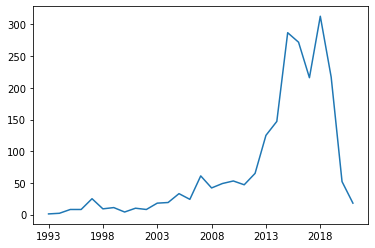

In [8]:
df["release_year"].value_counts().sort_index().plot(kind="line")

#graph count by year ordered by index (column 1 of series) 

In [9]:
diff_ref = df.groupby('artists')['word_searched'].unique().apply(len).sort_values(ascending=False)
diff_ref.head(15)
#counts number of different words used by each rapper

artists
Rohff         9
JuL           8
Booba         7
Sofiane       7
La Fouine     7
Naps          7
Lino          7
Lacrim        7
Veerus        6
PNL           6
Zbatata       6
Falcko        6
Mister You    6
MMZ           6
Lartiste      6
Name: word_searched, dtype: int64

In [10]:
diff_punch = df.groupby('artists')['punch'].unique().apply(len).sort_values(ascending=False)
diff_punch.head(15)
#counts number of different punchs used by each rapper

artists
JuL               75
Rohff             44
Zbatata           28
MMZ               25
Naps              24
Falcko            24
Lacrim            23
PNL               21
Hayce Lemsi       20
Niska             19
Kalif Hardcore    16
Mister You        14
Ninho             14
Booba             14
Escobar Macson    13
Name: punch, dtype: int64

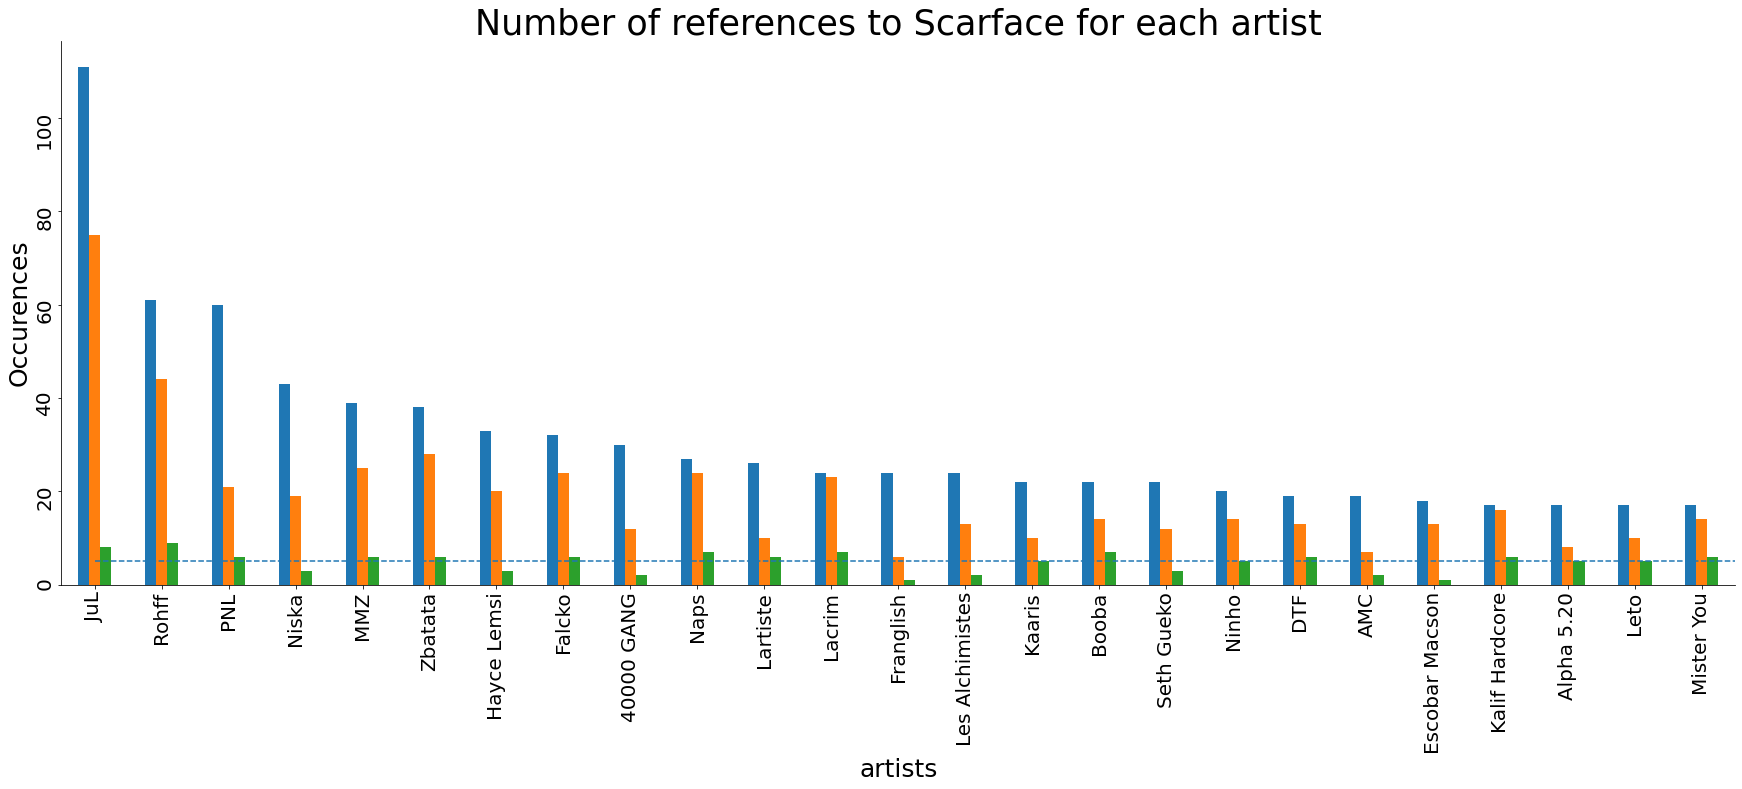

In [11]:
df_refs = pd.DataFrame({"single_mentions" : top_artist,
                        "diff_punch" : diff_punch,
                        "diff_mentions" : diff_ref},index=top_artist.index)

df_refs = df_refs.head(25)
#ind = df_refs.set_index(index, inplace = True)

bar = df_refs.plot(kind='bar',figsize=(30, 10), legend = None)



#Appearance
plt.xlabel("artists", fontsize = 25)
plt.xticks(rotation = 90, fontsize = 20)

plt.ylabel("Occurences", fontsize = 25)
plt.yticks(rotation = 90, fontsize = 20)

plt.title("Number of references to Scarface for each artist", fontsize = 35)
bar.spines['top'].set_visible(False)
bar.spines['right'].set_visible(False)

x = [0,50]
y = [5,5]
plt.plot(x,y,linestyle = 'dashed',label = '5 mentions différentes')

plt.show()


In [12]:
def overview(artist):
    nb_global = (df["artists"].str.contains(artist)).sum()
    nb_feat = ((df["artists"].str.contains(artist))&(df["artists"]!=artist)).sum()

    ref_count = df[df["artists"].str.contains(artist)]["word_searched"].value_counts()

    nb_feat = str(nb_feat)
    nb_global = str(nb_global)
    ref_count = str(ref_count)
    
    print(artist + " overview :")
    print(nb_global + " mentions in total including " + nb_feat +" on a featuring ")
    print("Words :")
    print(ref_count)
    
    
    df_global = df[df["artists"].str.contains(artist)]

    nb_songs = df_global["title"].value_counts()
    
    print( "Songs : ")
    print(nb_songs)

    display(df_global.head(2))

    #Display lines only for feats 
    #df_feat = df[(df["ARTISTE"].str.contains(artist))&(df["ARTISTE"]!=artist)]
    #print("Only feats :")
    #display(df_feat.head(1))
    
# function that counts all lines where artiste countains "artist" 
# nb_feat but is not exactly artist =>  number of lines where the artist is feated with someone else
# then shows all the line of an artist including when feats


In [13]:
overview("Salif")

ValueError: Cannot mask with non-boolean array containing NA / NaN values

In [ ]:
df.groupby("artists")["word_searched"].count()

#.value_counts().sort_values(ascending=False).head(10)

In [ ]:
data = {}

for k,v in df.iterrows():
#k = iteration, v = rest of the df
    artist_name = v["artists"]
    artist_data = None
    current_search = v["word_searched"]
    
    if not artist_name in data:
        artist_data={}
        data[artist_name]=artist_data
    else: 
        current_count = None
        artist_data=data[artist_name]
        
    if not current_search in artist_data:
        current_count = 1
    else: 
        current_count = artist_data[current_search]
        current_count +=1
    artist_data[current_search]=current_count

#for all artist creates a dictionnary with all the mentions they used and their count

In [ ]:
df_search = pd.DataFrame(data)
df_s = df_search.T.fillna(0) 
#inverse les colonnes et les lignes + remplace tous les NaN par 0 et les range dans df_s


df_s.insert(0,"total",df_s.sum(axis=1))
df_s.sort_values("total",ascending=False).head(10)

In [ ]:
#count most used words in FULL PUNCH

words = {}

for k,v in df.iterrows():
#k = iteration, v = rest of the df
    artist_name = v["artists"]
    artist_data = None
    current_search = v["word_searched"]
    
    if not artist_name in data:
        artist_data={}
        data[artist_name]=artist_data
    else: 
        current_count = None
        artist_data=data[artist_name]
        
    if not current_search in artist_data:
        current_count = 1
    else: 
        current_count = artist_data[current_search]
        current_count +=1
    artist_data[current_search]=current_count

#for all artist creates a dictionnary with all the mentions they used and their count

In [ ]:
#function that counts the words in a string
def word_count(str):
    counts = dict()
    words = str.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts

In [ ]:
df_all_punchs = df['full_punch'].str.cat(sep=' ').lower()

#concatenate all the column full punch and turns it into a string in lowercase

w_count = word_count(df_all_punchs)
df_w_count = DataFrame(list(w_count.items()),columns = ['word','count']) #turns it into a dataframe that can be ordered (ce n'est pas le cas d'un dict)

df_w_count = df_w_count.sort_values(by=['count'],ascending=False)
df_w_count.head(10)

#ATTENTION LES MOTS NE SONT PAS NORMALISES

In [ ]:
#removing stop words
#list of french stop words
stop  = {"words":["a","à","â","abord","afin","ah","ai","aie","ainsi","allaient","allo","allô","allons","après","assez","attendu","au","aucun","aucune","aujourd","aujourd\u0027hui","auquel","aura","auront","aussi","autre","autres","aux","auxquelles","auxquels","avaient","avais","avait","avant","avec","avoir","ayant","b","bah","beaucoup","bien","bigre","boum","bravo","brrr","c","ça","car","ce","ceci","cela","celle","celle-ci","celle-là","celles","celles-ci","celles-là","celui","celui-ci","celui-là","cent","cependant","certain","certaine","certaines","certains","certes","ces","cet","cette","ceux","ceux-ci","ceux-là","chacun","chaque","cher","chère","chères","chers","chez","chiche","chut","ci","cinq","cinquantaine","cinquante","cinquantième","cinquième","clac","clic","combien","comme","comment","compris","concernant","contre","couic","crac","d","da","dans","de","debout","dedans","dehors","delà","depuis","derrière","des","dès","désormais","desquelles","desquels","dessous","dessus","deux","deuxième","deuxièmement","devant","devers","devra","différent","différente","différentes","différents","dire","divers","diverse","diverses","dix","dix-huit","dixième","dix-neuf","dix-sept","doit","doivent","donc","dont","douze","douzième","dring","du","duquel","durant","e","effet","eh","elle","elle-même","elles","elles-mêmes","en","encore","entre","envers","environ","es","ès","est","et","etant","étaient","étais","était","étant","etc","été","etre","être","eu","euh","eux","eux-mêmes","excepté","f","façon","fais","faisaient","faisant","fait","feront","fi","flac","floc","font","g","gens","h","ha","hé","hein","hélas","hem","hep","hi","ho","holà","hop","hormis","hors","hou","houp","hue","hui","huit","huitième","hum","hurrah","i","il","ils","importe","j","je","jusqu","jusque","k","l","la","là","laquelle","las","le","lequel","les","lès","lesquelles","lesquels","leur","leurs","longtemps","lorsque","lui","lui-même","m","ma","maint","mais","malgré","me","même","mêmes","merci","mes","mien","mienne","miennes","miens","mille","mince","moi","moi-même","moins","mon","moyennant","n","na","ne","néanmoins","neuf","neuvième","ni","nombreuses","nombreux","non","nos","notre","nôtre","nôtres","nous","nous-mêmes","nul","o","o|","ô","oh","ohé","olé","ollé","on","ont","onze","onzième","ore","ou","où","ouf","ouias","oust","ouste","outre","p","paf","pan","par","parmi","partant","particulier","particulière","particulièrement","pas","passé","pendant","personne","peu","peut","peuvent","peux","pff","pfft","pfut","pif","plein","plouf","plus","plusieurs","plutôt","pouah","pour","pourquoi","premier","première","premièrement","près","proche","psitt","puisque","q","qu","quand","quant","quanta","quant-à-soi","quarante","quatorze","quatre","quatre-vingt","quatrième","quatrièmement","que","quel","quelconque","quelle","quelles","quelque","quelques","quelqu\u0027un","quels","qui","quiconque","quinze","quoi","quoique","r","revoici","revoilà","rien","s","sa","sacrebleu","sans","sapristi","sauf","se","seize","selon","sept","septième","sera","seront","ses","si","sien","sienne","siennes","siens","sinon","six","sixième","soi","soi-même","soit","soixante","son","sont","sous","stop","suis","suivant","sur","surtout","t","ta","tac","tant","te","té","tel","telle","tellement","telles","tels","tenant","tes","tic","tien","tienne","tiennes","tiens","toc","toi","toi-même","ton","touchant","toujours","tous","tout","toute","toutes","treize","trente","très","trois","troisième","troisièmement","trop","tsoin","tsouin","tu","u","un","une","unes","uns","v","va","vais","vas","vé","vers","via","vif","vifs","vingt","vivat","vive","vives","vlan","voici","voilà","vont","vos","votre","vôtre","vôtres","vous","vous-mêmes","vu","w","x","y","z","zut","alors","aucuns","bon","devrait","dos","droite","début","essai","faites","fois","force","haut","ici","juste","maintenant","mine","mot","nommés","nouveaux","parce","parole","personnes","pièce","plupart","seulement","soyez","sujet","tandis","valeur","voie","voient","état","étions"]}

df_w_count_without_stop = df_w_count[~df_w_count["word"].isin(stop['words'])]
df_w_count_without_stop.head(20)




In [ ]:
#DL list

df_w_count_without_stop.to_csv(r'D:\WORK\RAPSODIE\Code\Python\Scarface\word_count.csv', index = False)